In [2]:
!pip install --quiet duckdb
!pip install --quiet pandasql
import pandasql as psql
import seaborn as sns
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import sqlite3 
import duckdb
import time
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 63.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
#con = sqlite3.connect("sqlite-sakila.db")
df = pd.read_csv("listdf.csv")
df1= pd.read_csv("orderdf1.csv")
df2= pd.read_csv("Sales targetdf2.csv")



**Division of Categories**

In [ ]:
sql_query ='select df.customer_name , df.order_date , df.city, df1.category from df INNER JOIN df1 ON df.order_id = df1.order_id where category = "Clothing"; '
print(psql.sqldf(sql_query ,locals()).head())

  Customer_Name Order_Date       City  Category
0        Bharat   1/4/2018  Ahmedabad  Clothing
1        Bharat   1/4/2018  Ahmedabad  Clothing
2         Pearl   1/4/2018       Pune  Clothing
3         Pearl   1/4/2018       Pune  Clothing
4         Jahan   3/4/2018     Bhopal  Clothing


In [ ]:
sql_query ='select df.customer_name , df.order_date , df.city, df1.category from df INNER JOIN df1 ON df.order_id = df1.order_id where category = "Furniture" ; '
print(psql.sqldf(sql_query ,locals()).head())

  Customer_Name Order_Date       City   Category
0        Bharat   1/4/2018  Ahmedabad  Furniture
1         Jahan   3/4/2018     Bhopal  Furniture
2       Aarushi   8/4/2018    Chennai  Furniture
3       Aarushi   8/4/2018    Chennai  Furniture
4        Yogesh   9/4/2018      Patna  Furniture


In [ ]:
sql_query ='select df.customer_name , df.order_date , df.city, df1.category from df INNER JOIN df1 ON df.order_id = df1.order_id where category = "Electronics"; '
print(psql.sqldf(sql_query ,locals()).head())

  Customer_Name Order_Date       City     Category
0        Bharat   1/4/2018  Ahmedabad  Electronics
1         Pearl   1/4/2018       Pune  Electronics
2         Pearl   1/4/2018       Pune  Electronics
3         Pearl   1/4/2018       Pune  Electronics
4       Aarushi   8/4/2018    Chennai  Electronics


**Orders in 1/4/2018 and Order type**

If you want to know the orders on any day, you can change the code and write any date you want to know the orders



In [ ]:
sql_query ='select df.customer_name , df.order_date , df.city, df1.category from df INNER JOIN df1 ON df.order_id = df1.order_id where category = "Furniture" OR Order_Date = "1/4/2018"  ; '
print(psql.sqldf(sql_query ,locals()).head(9))

  Customer_Name Order_Date       City     Category
0        Bharat   1/4/2018  Ahmedabad     Clothing
1        Bharat   1/4/2018  Ahmedabad     Clothing
2        Bharat   1/4/2018  Ahmedabad  Electronics
3        Bharat   1/4/2018  Ahmedabad    Furniture
4         Pearl   1/4/2018       Pune     Clothing
5         Pearl   1/4/2018       Pune     Clothing
6         Pearl   1/4/2018       Pune  Electronics
7         Pearl   1/4/2018       Pune  Electronics
8         Pearl   1/4/2018       Pune  Electronics


**Orders that must be delivered to the customer before this date**

In [ ]:
sql_query ='select * from df where Order_Date < "28-03-2019"   ; '
print(psql.sqldf(sql_query ,locals()).tail(10))

    order_id  Order_Date Customer_Name             State        City
330  B-26085  26-03-2019     Shrichand            Punjab  Chandigarh
331  B-26086  26-03-2019        Mukesh           Haryana  Chandigarh
332  B-26087  26-03-2019       Vandana  Himachal Pradesh       Simla
333  B-26088  26-03-2019        Bhavna            Sikkim     Gangtok
334  B-26089  26-03-2019         Kanak               Goa         Goa
335  B-26090  27-03-2019         Sagar          Nagaland      Kohima
336  B-26091  27-03-2019         Manju    Andhra Pradesh   Hyderabad
337  B-26092  27-03-2019        Ramesh           Gujarat   Ahmedabad
338  B-26093  27-03-2019        Sarita       Maharashtra        Pune
339  B-26094  27-03-2019        Deepak    Madhya Pradesh      Bhopal


**Highest target with month and category**

   Category  max(Target) month_of_date
0  Clothing        16000        18-Oct


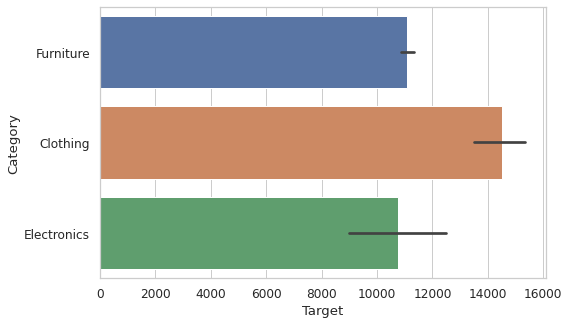

In [ ]:
sql_query ='select Category,max(Target),month_of_date  from df2  ;' 
print(psql.sqldf(sql_query ,locals()))
sns.barplot(data=df2,x='Target', y='Category')

select second highest Target

In [ ]:
sql_query ='select Category,max(Target),month_of_date  from df2   where Target<(select max(Target) from df2) ;'
print(psql.sqldf(sql_query ,locals()))

   Category  max(Target) month_of_date
0  Clothing        14000        18-Jul


# **connect between three tables**

In [ ]:
sql_query11 ='select df1.Profit,df1.category,df1.sub_category,df1.order_id ,df2.target,df2.month_of_date,df.Order_Date from df1 INNER JOIN df2 ON df1.Category=df2.Category INNER JOIN df ON df1.order_id = df.order_id ;' 
print(psql.sqldf(sql_query11 ,locals()))

       Profit   Category Sub_Category order_id  Target month_of_date  \
0       -1148  Furniture    Bookcases  B-25601   10400        18-Apr   
1       -1148  Furniture    Bookcases  B-25601   10900        18-Aug   
2       -1148  Furniture    Bookcases  B-25601   11400        18-Dec   
3       -1148  Furniture    Bookcases  B-25601   10800        18-Jul   
4       -1148  Furniture    Bookcases  B-25601   10600        18-Jun   
...       ...        ...          ...      ...     ...           ...   
17995      16   Clothing        Shirt  B-26100   16000        18-Oct   
17996      16   Clothing        Shirt  B-26100   14000        18-Sep   
17997      16   Clothing        Shirt  B-26100   16000        19-Feb   
17998      16   Clothing        Shirt  B-26100   16000        19-Jan   
17999      16   Clothing        Shirt  B-26100   16000        19-Mar   

       Order_Date  
0        1/4/2018  
1        1/4/2018  
2        1/4/2018  
3        1/4/2018  
4        1/4/2018  
...           .

**max Target with the month**

   Category  max(Target) month_of_date
0  Clothing        16000        18-Oct


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


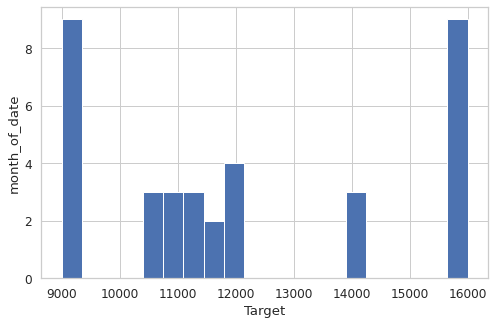

In [ ]:
sql_query ='select Category,max(Target),month_of_date  from df2  ;' 
print(psql.sqldf(sql_query ,locals()))
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df2['Target'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Target', ylabel='month_of_date');
#sns.boxplot(x='Target',y='month_of_date',data=df2)

**max profit with category**


      Category  max(Profit)  Amount
0  Electronics         1698    4141


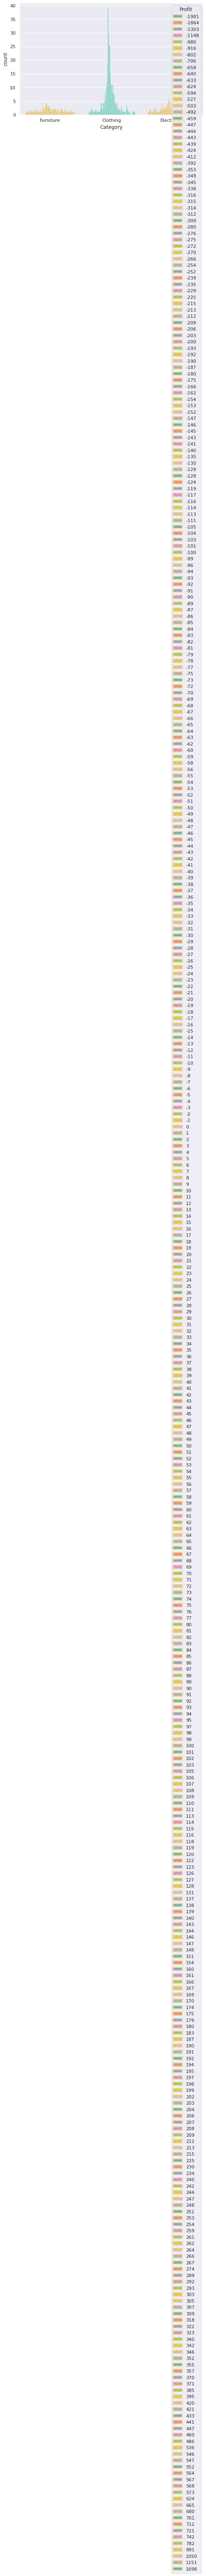

In [ ]:
sql_query ='select Category,max(Profit),Amount  from df1  ;' 
print(psql.sqldf(sql_query ,locals()))
sns.countplot(x='Category',hue='Profit',data=df1,palette = "Set2",color="salmon",linewidth=2,edgecolor=sns.color_palette("BrBG", 2))
sns.set_theme(style="darkgrid")
##sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
#sns.distplot(
 #   df1['Profit'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
#).set(xlabel='Profit', ylabel='Category');


 **profits of only Furniture Category**

     Profit   Category Sub_Category order_id Customer_Name
0     -1148  Furniture    Bookcases  B-25601        Bharat
1       -30  Furniture       Chairs  B-25603         Jahan
2     -1864  Furniture       Tables  B-25608       Aarushi
3         0  Furniture       Chairs  B-25608       Aarushi
4        -5  Furniture  Furnishings  B-25610        Yogesh
..      ...        ...          ...      ...           ...
238    -338  Furniture    Bookcases  B-26081       Aarushi
239      51  Furniture    Bookcases  B-26093        Sarita
240     -26  Furniture       Chairs  B-26097          Vini
241     179  Furniture       Chairs  B-26098         Pinky
242     230  Furniture       Chairs  B-26100        Hitika

[243 rows x 5 columns]


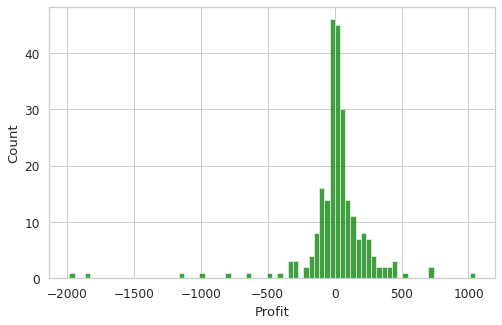

In [ ]:
sql_query2 ='select df1.Profit,df1.category,df1.sub_category, df1.order_id ,df.Customer_Name from df1 INNER JOIN df ON df1.order_id=df.order_id where df1.category="Furniture" ;' 
print(psql.sqldf(sql_query2 ,locals()))
sql_query2 = sns.histplot(data=df1[df1["Category"]=="Furniture"], x= 'Profit', color='green')
plt.show()


 **Max profit of only Furniture Category**

In [ ]:
sql_query ='select MAX(Profit),category,sub_category, order_id from df1 where category="Furniture" ;' 
print(psql.sqldf(sql_query ,locals()))
#sql_query ='select df.customer_name , df.order_date , df.city, df1.category from df INNER JOIN df1 ON df.order_id = df1.order_id where category = "Electronics"; '
#print(psql.sqldf(sql_query ,locals()).head())

   MAX(Profit)   Category Sub_Category order_id
0         1050  Furniture    Bookcases  B-25761


In [ ]:
sql_query='select * from df1  ; '
print(psql.sqldf(sql_query,locals()).describe().round(2))

            Amount       Profit     Quantity
count  1500.000000  1500.000000  1500.000000
mean    287.668000    15.970000     3.743333
std     461.050488   169.140565     2.184942
min       4.000000 -1981.000000     1.000000
25%      45.000000    -9.250000     2.000000
50%     118.000000     9.000000     3.000000
75%     322.000000    38.000000     5.000000
max    5729.000000  1698.000000    14.000000


**The highest profit in the year 2018**

  order_id  max(df1.Profit) Order_Date     Category Sub_Category  City
0  B-25602             1151   1/4/2018  Electronics       Phones  Pune


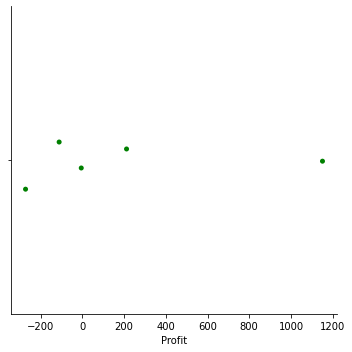

In [ ]:
sql_query ='select df.order_id ,max(df1.Profit),df.Order_Date,df1.Category,df1.Sub_Category ,df.City from df1 INNER JOIN df ON df1.order_id=df.order_id where df.Order_Date like "%2018"   ; '
print(psql.sqldf(sql_query ,locals())) 
sql_query = sns.catplot(data=df1[df1["order_id"]== "B-25602"], x= 'Profit', color='green') #pairplot   stripplot
plt.show()

**The lowest profit in the year 2018**

  order_id  min(df1.Profit) Order_Date   Category Sub_Category       City
0  B-25798            -1981  1/10/2018  Furniture    Bookcases  Hyderabad


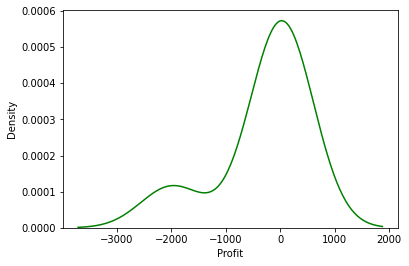

In [91]:
sql_query ='select df.order_id ,min(df1.Profit),df.Order_Date,df1.Category,df1.Sub_Category ,df.City from df1 INNER JOIN df ON df1.order_id=df.order_id where df.Order_Date like "%2018"   ; '
print(psql.sqldf(sql_query ,locals())) 
sql_query = sns.kdeplot(data=df1[df1["order_id"]== "B-25798"], x= 'Profit', color='green') 
plt.show()

**The highest profit in the year 2019**

  order_id  max(df1.Profit)  Order_Date     Category Sub_Category       City
0  B-25973             1698  24-01-2019  Electronics     Printers  Allahabad


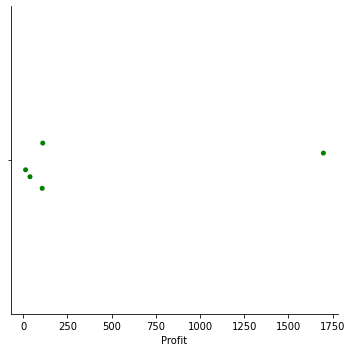

In [94]:
sql_query ='select df.order_id ,max(df1.Profit),df.Order_Date,df1.Category,df1.Sub_Category ,df.City from df1 INNER JOIN df ON df1.order_id=df.order_id where df.Order_Date like "%2019"   ; '
print(psql.sqldf(sql_query ,locals())) 
sql_query = sns.catplot(data=df1[df1["order_id"]== "B-25973"], x= 'Profit', color='green') 
plt.show()

**The lowest profit in the year 2019**

  order_id  min(df1.Profit)  Order_Date     Category Sub_Category        City
0  B-26022            -1303  18-02-2019  Electronics       Phones  Chandigarh


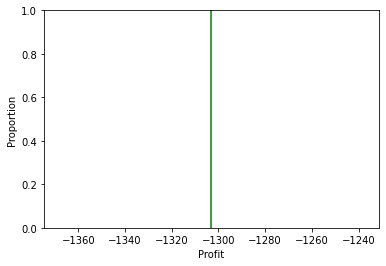

In [97]:
sql_query ='select df.order_id ,min(df1.Profit),df.Order_Date,df1.Category,df1.Sub_Category ,df.City from df1 INNER JOIN df ON df1.order_id=df.order_id where df.Order_Date like "%2019"   ; '
print(psql.sqldf(sql_query ,locals())) 
sql_query = sns.ecdfplot(data=df1[df1["order_id"]== "B-26022"], x= 'Profit', color='green') 
plt.show()

**Select columns in a particular month**

In [99]:
sql_query ='select df.Order_Date,df.City,df1.Profit,df1.Category,df1.Sub_Category from df INNER JOIN df1 ON df.order_id=df1.order_id where df.Order_Date  like "_/1/%"   ; '
print(psql.sqldf(sql_query ,locals()).head(10))

  Order_Date                City  Profit     Category      Sub_Category
0   1/1/2019               Patna      10    Furniture       Furnishings
1   1/1/2019               Patna      15  Electronics       Accessories
2   2/1/2019  Thiruvananthapuram    -135    Furniture            Chairs
3   2/1/2019  Thiruvananthapuram     -85    Furniture            Chairs
4   2/1/2019  Thiruvananthapuram     536    Furniture         Bookcases
5   3/1/2019          Chandigarh     -94  Electronics  Electronic Games
6   3/1/2019          Chandigarh      13     Clothing           T-shirt
7   3/1/2019          Chandigarh      17     Clothing       Hankerchief
8   3/1/2019          Chandigarh      29     Clothing       Hankerchief
9   3/1/2019          Chandigarh      89     Clothing           T-shirt


**Profits achieved in 2018 with Categories and Sub-... "Profit > 1 "**

In [100]:
sql_query ='select df.Order_Date,df.City,df1.Profit,df1.Category,df1.Sub_Category from df INNER JOIN df1 ON df.order_id=df1.order_id where df.Order_Date like "%2018" And df1.Profit>1  ; '
print(psql.sqldf(sql_query ,locals()).head(10))


  Order_Date       City  Profit     Category Sub_Category
0   1/4/2018       Pune     212     Clothing        Saree
1   1/4/2018       Pune    1151  Electronics       Phones
2   3/4/2018     Bhopal       5     Clothing     Trousers
3   3/4/2018     Bhopal      16     Clothing        Stole
4   3/4/2018     Bhopal      18     Clothing        Kurti
5   3/4/2018     Bhopal      36     Clothing        Stole
6   3/4/2018     Jaipur       5     Clothing        Saree
7   3/4/2018     Jaipur      17     Clothing      T-shirt
8   6/4/2018  Bangalore       4     Clothing        Shirt
9   6/4/2018    Kashmir      15     Clothing     Leggings


<BarContainer object of 1 artists>

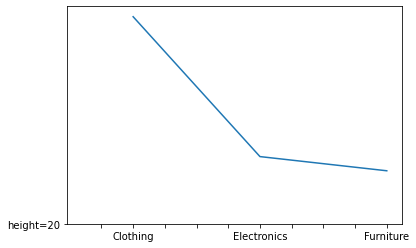

In [103]:
df1['Category'].value_counts().plot().bar('x=20','height=20') 

In [ ]:
df1.groupby('Profit').groups

{-1981: [589], -1864: [22], -1303: [1252], -1148: [0], -980: [529], -916: [198], -802: [585], -706: [368], -658: [236], -640: [138], -633: [605], -624: [931], -594: [31], -527: [489], -503: [249], -492: [467], -459: [257], -447: [117, 528], -444: [536], -443: [504], -439: [367], -424: [365], -412: [977], -392: [290], -353: [533], -349: [60], -345: [256], -338: [1431], -316: [266, 578], -315: [458], -314: [583], -312: [160, 453], -309: [1486], -280: [508], -276: [62, 466], -275: [277, 335], -272: [5], -270: [44], -266: [525], -254: [400], -252: [568], -239: [91], -235: [436], -229: [1140], -225: [116, 402], -215: [454], -213: [254], -212: [1485], -209: [552], -206: [134], -203: [307], -200: [193], -193: [285, 482, 1039], -192: [549], -190: [312], -187: [221], -180: [179], -175: [1123], -166: [11], -162: [576], -154: [374], -153: [89, 289, 494], -152: [1091], -147: [308], -146: [416, 546], -145: [1373], -143: [516], -141: [316], -140: [1082], -135: [966], -130: [76], -129: [70], -128: [3

**Total profits made in Furniture**

In [106]:
df1[df1["Category" ] == "Furniture"].groupby('Sub_Category').sum()["Profit"].nlargest()

Sub_Category
Bookcases      4888
Furnishings     844
Chairs          577
Tables        -4011
Name: Profit, dtype: int64

In [55]:
df1[df1["Category" ] == "Furniture"].groupby(['Sub_Category','Quantity']).max()["Profit"].nlargest()

Sub_Category  Quantity
Bookcases     5           1050
Chairs        5            721
Bookcases     3            536
Chairs        4            460
Bookcases     10           447
Name: Profit, dtype: int64